# Pymaceuticals Inc.
---

### Analysis

-Jose Moncada
- Analysis.

- Effectiveness of Treatments on Tumor Size: The data shows that different treatments lead to varying tumor sizes in the mice. By looking at how each drug regimen affects tumor volume, we can identify which treatments work best. This insight could help shape future research and treatment strategies for similar mouse models.

Impact of Age and Sex on Treatment Response: When we consider the age and sex of the mice, we notice some interesting patterns. For example, younger mice may react differently to treatments than older ones. Understanding these differences can help us tailor treatments more effectively and improve outcomes based on demographic factors.

Link Between Weight and Tumor Growth: There seems to be a relationship between the weight of the mice and their tumor volume. If we find that heavier mice tend to have larger tumors, it could suggest that weight plays a significant role in tumor development or how mice respond to treatment. This insight could be crucial for designing future experiments and understanding cancer dynamics better.
 

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on= "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice.
mice_unique = combined_data['Mouse ID'].nunique()
mice_unique

249

In [10]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ids

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']
duplicate_mouse_data_filtered = duplicate_mouse_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
duplicate_mouse_data_filtered

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data['Mouse ID'] != 'g989']
clean_data_filtered = clean_data[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
clean_data_filtered.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [16]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_clean = clean_data['Mouse ID'].nunique()
num_unique_mice_clean

248

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err='sem'
).reset_index()

summary_stats_sorted = summary_stats.sort_values(by='Drug Regimen')
summary_stats


,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_single_line = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean', 
    Median='median', 
    Variance='var', 
    Std_Dev='std', 
    SEM='sem'
).reset_index()

# Rename the columns to have a title only once
summary_stats_single_line.columns = ['Drug Regimen', 
                                     'Tumor Volume (mm3) Mean', 
                                     'Tumor Volume (mm3) Median', 
                                     'Tumor Volume (mm3) Variance', 
                                     'Tumor Volume (mm3) Std Dev', 
                                     'Tumor Volume (mm3) SEM']

# Display the summary statistics DataFrame without the index
summary_stats_single_line


,Drug Regimen,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Std Dev,Tumor Volume (mm3) SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

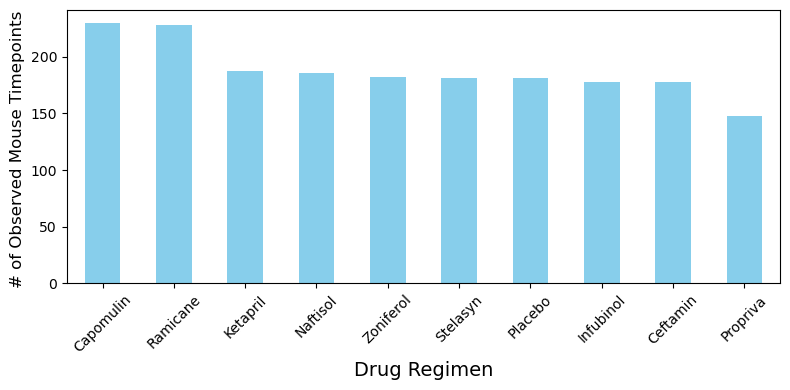

In [42]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the total number of rows (Mouse ID/Timepoints) for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
ax = regimen_counts.plot(kind='bar', color='skyblue', figsize=(8, 4))

# Add title and labels
ax.set_title('', fontsize=12)
ax.set_xlabel('Drug Regimen', fontsize=14)
ax.set_ylabel('# of Observed Mouse Timepoints ', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

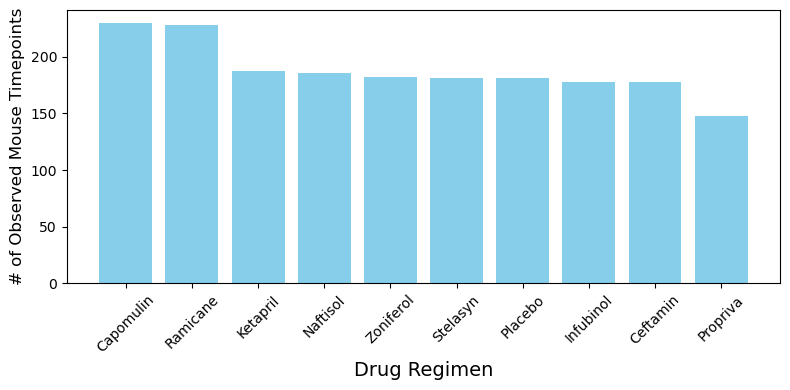

In [46]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8, 4))  # Set the size of the figure
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue')  # Create the bar plot

# Add title and labels
plt.title('', fontsize=12)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('# of Observed Mouse Timepoints', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  

# Adjust layout to make room for labels
plt.tight_layout()  

# Show the plot
plt.show()

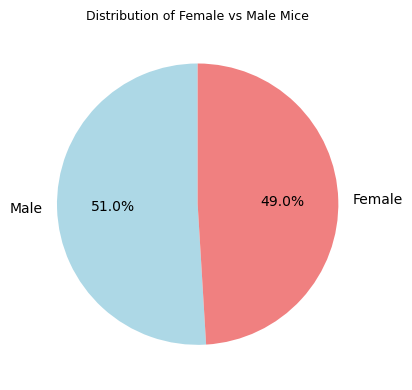

In [66]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
gender_counts = clean_data['Sex'].value_counts()
ax = gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 4), colors=['lightblue', 'lightcoral'])

# Add title
ax.set_title('Distribution of Female vs Male Mice', fontsize=9)

# Show the plot
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.tight_layout()  # Adjust layout
plt.show()

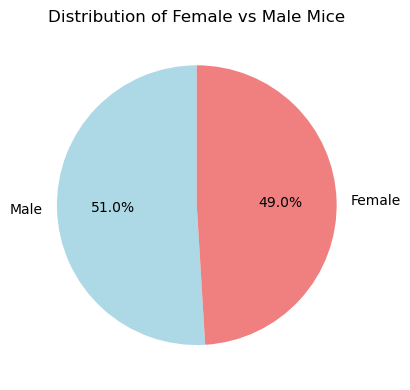

In [77]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Get the unique mice with their gender
gender_counts = clean_data['Sex'].value_counts()

# Create a pie chart using pyplot
plt.figure(figsize=(8, 4))  # Set the size of the figure
plt.pie(gender_counts, autopct='%1.1f%%', startangle=90, 
        colors=['lightblue', 'lightcoral'], 
        labels=gender_counts.index)  # Use gender labels

# Add title
plt.title('Distribution of Female vs Male Mice', fontsize=12)

# Show the plot
plt.ylabel('')  # Hide the y-label for better aesthetics
plt.tight_layout()  # Adjust layout
plt.show()


## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Filter for the specified treatment regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = clean_data[clean_data['Drug Regimen'].isin(treatment_regimens)]

# Get the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, filtered_data, on=['Mouse ID', 'Timepoint'])

# Display the final tumor volume DataFrame
final_tumor_volume = final_tumor_volume[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
final_tumor_volume

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543
...,...,...,...,...
95,y769,Ceftamin,45,68.594745
96,y793,Capomulin,45,31.896238
97,y865,Ceftamin,45,64.729837
98,z578,Ramicane,45,30.638696


In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through treatments to calculate the IQR and determine outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to the tumor_vol_data list
    tumor_vol_data.append(tumor_volumes)

    # Calculate the IQR
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print out results for each treatment
    print(f"{treatment} - IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Potential outliers for {treatment}: {tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]}\n")


Capomulin - IQR: 7.781863460000004, Lower Bound: 20.70456164999999, Upper Bound: 51.83201549
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane - IQR: 9.098536719999998, Lower Bound: 17.912664470000003, Upper Bound: 54.30681135
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol - IQR: 11.477135160000003, Lower Bound: 36.83290494999999, Upper Bound: 82.74144559000001
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin - IQR: 15.577752179999997, Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)



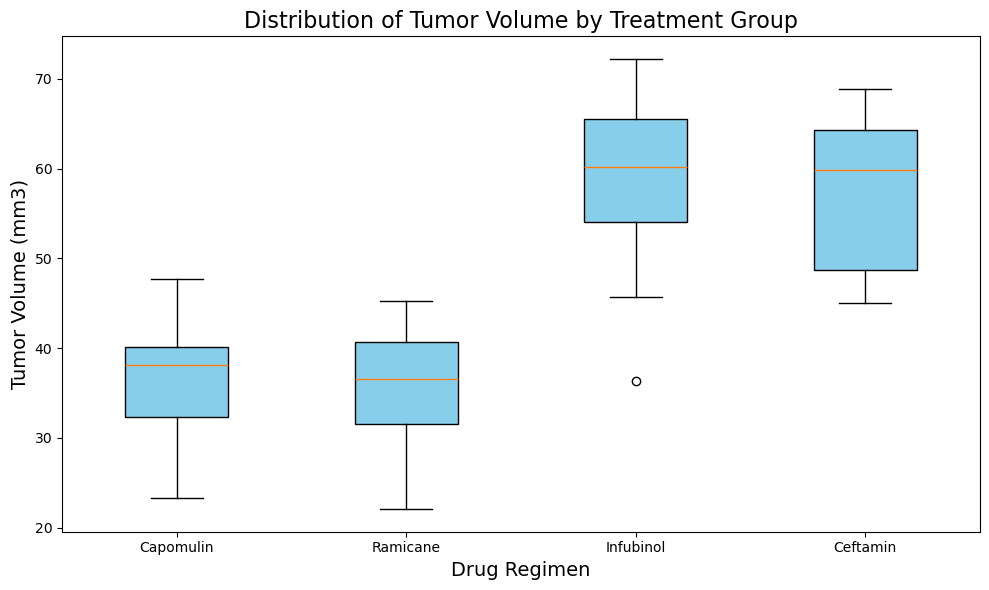

In [87]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
# Create a box plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, boxprops=dict(facecolor='skyblue'))

# Add title and labels
plt.title('Distribution of Tumor Volume by Treatment Group', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

## Line and Scatter Plots

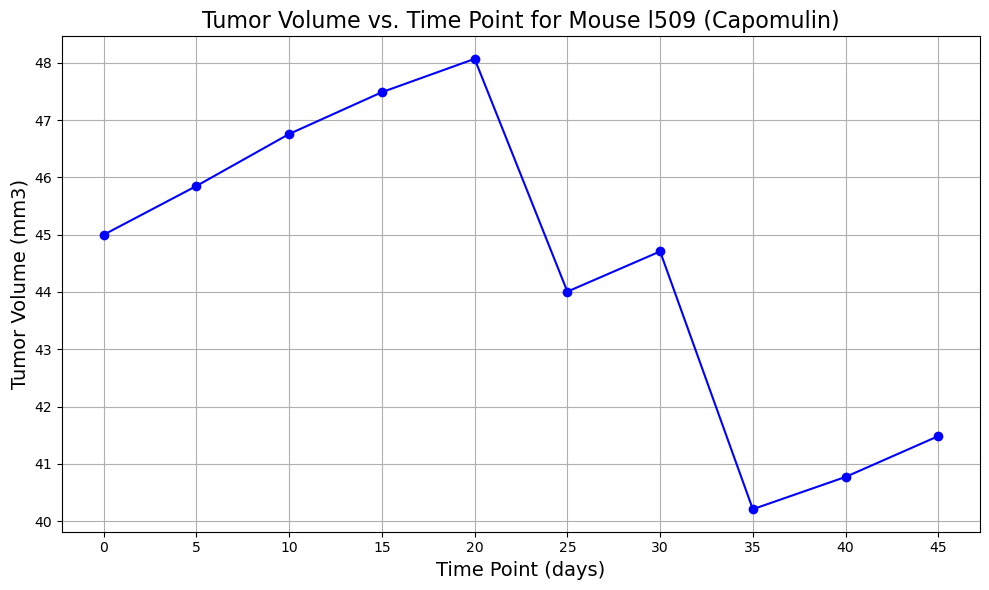

In [92]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for a specific mouse treated with Capomulin
mouse_id = 'l509'  # You can change this to any other mouse ID treated with Capomulin
capomulin_data = clean_data[clean_data['Mouse ID'] == mouse_id]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='o', color='blue')

# Add title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)', fontsize=16)
plt.xlabel('Time Point (days)', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)

# Show the plot
plt.xticks(capomulin_data['Timepoint'])  # Ensure all time points are shown on the x-axis
plt.grid()  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()

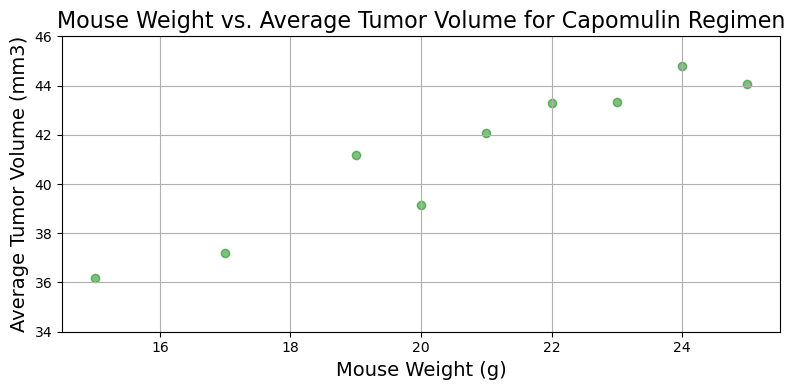

In [117]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for mice treated with Capomulin
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse by weight
average_tumor_volume = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='green', alpha=0.5)

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=16)
plt.xlabel('Mouse Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)

# Set Y-axis limit from 34 to 46
plt.ylim(34, 46)

# Show the plot
plt.grid()  # Add grid for better readability
plt.tight_layout()  # Adjust layout
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.95
Slope: 0.89
Intercept: 22.76
R-squared: 0.90


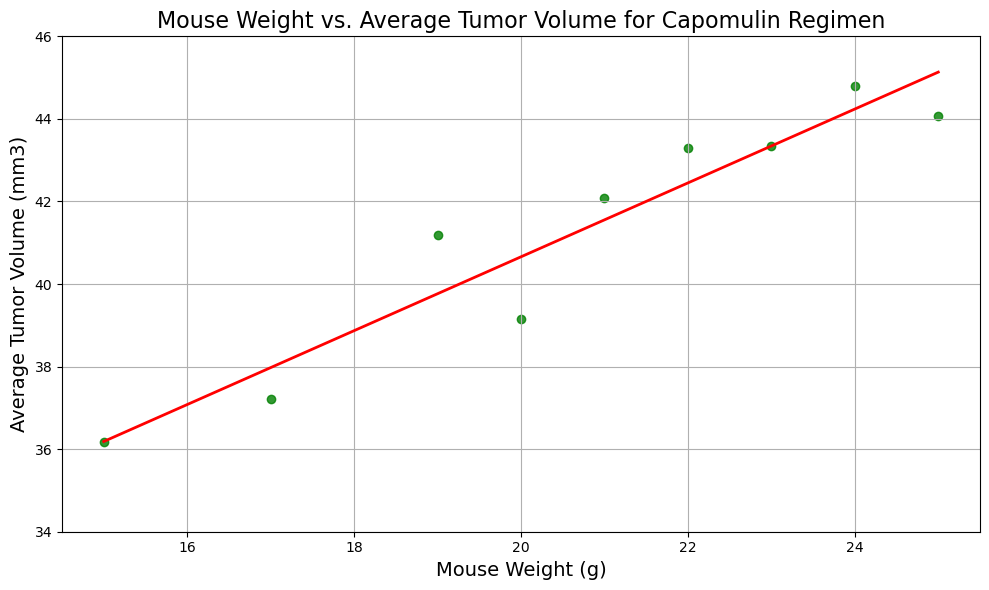

In [120]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Import the necessary library
from scipy.stats import linregress

# Calculate the correlation coefficient
correlation = average_tumor_volume['Weight (g)'].corr(average_tumor_volume['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation:.2f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'])

# Print the linear regression results
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.2f}")

# Generate the regression line data
regression_line = slope * average_tumor_volume['Weight (g)'] + intercept

# Create a scatter plot with the regression line
plt.figure(figsize=(10, 6))
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], color='green', alpha=0.8)
plt.plot(average_tumor_volume['Weight (g)'], regression_line, color='red', linewidth=2)  # Add regression line

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=16)
plt.xlabel('Mouse Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)

# Set Y-axis limit from 34 to 46
plt.ylim(34, 46)

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()